In [1]:
%%bash
pip install --upgrade mxnet gluoncv
# optional - for displaying the image in notebook
pip install ipyplot
# After you run this cell, you need to restart
# the notebook

Requirement already up-to-date: mxnet in /home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages (1.6.0)
Requirement already up-to-date: gluoncv in /home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages (0.7.0)
Requirement not upgraded as not directly required: graphviz<0.9.0,>=0.8.1 in /home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages (from mxnet) (0.8.4)
Requirement not upgraded as not directly required: requests<3,>=2.20.0 in /home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages (from mxnet) (2.20.0)
Requirement not upgraded as not directly required: numpy<2.0.0,>1.16.0 in /home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages (from mxnet) (1.16.4)
Requirement not upgraded as not directly required: portalocker in /home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages (from gluoncv) (1.7.0)
Requirement not upgraded as not directly required: scipy in /home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6

You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#import gluoncv as gcv
import mxnet as mx
# optional for displaying the image
import ipyplot
import numpy as np
# class method for displaying images
import matplotlib.pyplot as plt




from mxnet import nd, image

import gluoncv as gcv
gcv.utils.check_version('0.6.0')
from gluoncv.data import ImageNet1kAttr
from gluoncv.data.transforms.presets.imagenet import transform_eval
from gluoncv.model_zoo import get_model



The input picture is classified to be
	[volcano], with probability 0.832.
	[alp], with probability 0.051.
	[valley], with probability 0.006.
	[mountain tent], with probability 0.005.
	[lakeside], with probability 0.005.


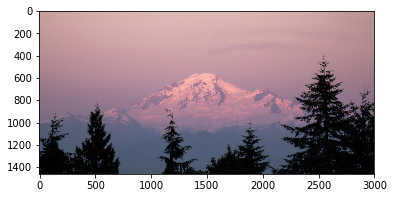

In [7]:
# will mxnet work with a nparray.  Using the original simple script as a guide


# Load Model
network = gcv.model_zoo.get_model('ResNet50_v1d', pretrained=True)
# or
#network = gcv.model_zoo.resnet50_v1d(pretrained=True)
# Load Image
image = mx.image.image.imread('mt_baker.jpg')
# plot Image
plt.imshow(image.asnumpy())
# Tranform Image into mxnext array and NCHW format
image = gcv.data.transforms.presets.imagenet.transform_eval(image)
# Generate predictions
prediction = network(image)
# Print the top 5
topK = 5
ind = nd.topk(prediction, k=topK)[0].astype('int')
classes = network.classes
print('The input picture is classified to be')
for i in range(topK):
    print('\t[%s], with probability %.3f.'% (classes[ind[i].asscalar()], nd.softmax(prediction)[0][ind[i]].asscalar()))
